### Traffic and Air-Quality Stations Matching

The goal is to relate every traffic measurement with its closest Air Quality station in the city of Madrid

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os

from pyhandy.datautils import get_data_summary

from src.extraction import extract_traffic_locations_raw
from src.preprocessing import clean_traffic_locations_raw

In [2]:
#Obtener dataset en raw de puntos de medida de ubicacion

if os.path.isfile('../01-data/raw/pmed_ubicaciones_raw.feather'):
    #Si no estan ya descargados:
    pmed_ubicaciones_raw = extract_traffic_locations_raw()
else:
    ##Si ya estan descargados
    pmed_ubicaciones_raw = pd.read_feather('../01-data/raw/pmed_ubicaciones_raw.feather')

#Ahora toca procesar esto para tener solo dos columnas con las coordenadas x,y (longitud, latitud) por cada punto de medidas de trafico
get_data_summary(pmed_ubicaciones_raw)

Dataset has 42394 rows and 18 columns


,DataType,MissingPercent,Mean,Median,Mode,MinValue,MaxValue,NumOfUnique,UniqueValues,FracUnique
ColumnName,,,,,,,,,,
coord_x,float64,0.914776,4.417675e+05,4.415633e+05,438900.520296,4.291714e+05,4.508817e+05,3607,NaN,NaN
coord_y,float64,0.914776,4.475622e+06,4.475833e+06,4468530.13737,4.465113e+06,4.485163e+06,3607,NaN,NaN
distrito,float64,0.805822,1.072048e+01,1.100000e+01,15.0,1.000000e+00,2.100000e+01,21,NaN,NaN
id,float64,0.270982,5.894614e+03,5.589000e+03,5984.0,0.000000e+00,1.086400e+04,4636,NaN,NaN
idelem,float64,0.823536,5.300026e+03,5.246000e+03,1001.0,1.001000e+03,1.004700e+04,3931,NaN,NaN
latitud,float64,0.805609,4.042852e+01,4.043006e+01,40.406147,4.033245e+01,4.051561e+01,5387,NaN,NaN
longitud,float64,0.805609,-3.684551e+00,-3.685764e+00,-3.742233,-3.836943e+00,-3.580713e+00,5387,NaN,NaN
st_x,float64,0.717106,4.417685e+05,4.415648e+05,429165.2779,4.290559e+05,4.508817e+05,8466,NaN,NaN
st_y,float64,0.717106,4.475669e+06,4.475845e+06,4465109.03812,4.464902e+06,4.485420e+06,8469,NaN,NaN


In [3]:
#Numero de valores faltantes y no faltantes
pd.concat([pmed_ubicaciones_raw.count(),pmed_ubicaciones_raw.isnull().sum()],axis=1).rename(columns={0:'NonNulls',1:'Nulls'})

,NonNulls,Nulls
tipo_elem,42394,0
distrito,8232,34162
id,30906,11488
cod_cent,42394,0
nombre,42345,49
utm_x,8241,34153
utm_y,8241,34153
longitud,8241,34153
latitud,8241,34153
x,14540,27854


In [5]:
pmed_ubicaciones = clean_traffic_locations_raw(pmed_ubicaciones_raw)
get_data_summary(pmed_ubicaciones.astype({'year':str}))

Dataset has 5110 rows and 6 columns


,DataType,MissingPercent,Mean,Median,Mode,MinValue,MaxValue,NumOfUnique,UniqueValues,FracUnique
ColumnName,,,,,,,,,,
latitud,float64,0.000000,40.428042,40.428677,40.333717,40.332454,40.515611,5052,NaN,NaN
longitud,float64,0.000000,-3.688189,-3.690913,-3.779381,-3.836943,-3.580713,5052,NaN,NaN
cod_cent,object,0.000000,NaN,NaN,01001,NaN,NaN,5110,"[01001, 01002, 01003, 01004, 01005, 01006, 010...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
nombre,object,0.004697,NaN,NaN,-,NaN,NaN,4859,"[(AFO)M. USERA O-E(ALMENDRALES-GTA.CADIZ), (AF...","[0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.0..."
tipo_elem,object,0.000000,NaN,NaN,URB,NaN,NaN,5,"[494, 495, M30, URB, other]","[0.862, 0.083, 0.051, 0.004, 0.0]"
year,object,0.000000,NaN,NaN,2021,NaN,NaN,7,"[2014, 2016, 2017, 2018, 2019, 2020, 2021]","[0.893, 0.036, 0.029, 0.019, 0.017, 0.006, 0.0]"


Puntos geograficos de cada estacion de calidad de aire:

In [14]:
#Ahora obtenemos los puntos geograficos de cada estacion de calidad de aire
estaciones_calidad_aire_info = pd.read_csv("../01-data/raw/informacion_estaciones_red_calidad_aire.csv",encoding='latin-1',sep=';',decimal=',')
estaciones_calidad_aire_info.columns = estaciones_calidad_aire_info.columns.str.lower()
estaciones_calidad_aire_info = estaciones_calidad_aire_info\
                                .filter(items = ['codigo_corto','estacion','latitud','longitud'])\
                                .astype(dict(latitud=float,longitud=float,codigo_corto=int))
estaciones_calidad_aire_info = estaciones_calidad_aire_info.rename(columns={'estacion':'estacion_aire'})
get_data_summary(estaciones_calidad_aire_info)

Dataset has 24 rows and 4 columns


,DataType,MissingPercent,Mean,Median,Mode,MinValue,MaxValue,NumOfUnique,UniqueValues,FracUnique
ColumnName,,,,,,,,,,
latitud,float64,0.0,40.434426,40.431886,40.347147,40.347147,40.518070,24,NaN,NaN
longitud,float64,0.0,-3.679311,-3.687779,-3.77461,-3.774610,-3.580026,24,NaN,NaN
codigo_corto,int64,0.0,37.750000,39.500000,4,4.000000,60.000000,24,NaN,NaN
estacion_aire,object,0.0,NaN,NaN,Arturo Soria,NaN,NaN,24,"[Arturo Soria, Avda. Ramón y Cajal, Barajas Pu...","[0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.0..."


Relacionar cada punto de medida de trafico con su estacion de aire mas cercana:

In [7]:
aire_lat = estaciones_calidad_aire_info.latitud
aire_long = estaciones_calidad_aire_info.longitud

get_closest_aq_station_euclidean = lambda lat,long : estaciones_calidad_aire_info.codigo_corto.loc[np.sqrt((aire_lat-lat)**2+(aire_long-long)**2).idxmin()]
pmed_ubicaciones['codigo_estacion_aire'] = pmed_ubicaciones.apply(axis=1,func=lambda x : get_closest_aq_station_euclidean(x.latitud,x.longitud))
pmed_ubicaciones

,tipo_elem,cod_cent,nombre,longitud,latitud,year,codigo_estacion_aire
0,M30,04TL40PM01,04TL40PM01,-3.652823,40.404237,2021,36
1,URB,59022,Av. Badajoz - Torrelaguna-MartÃ­nez Villergas,-3.653885,40.442376,2021,16
2,URB,41058,Av. Albufera - Rafael Alberti-Fuengirola,-3.639857,40.387162,2021,40
3,URB,97306,OÂ´Donnell E-S (giro a Dr. Esquerdo) - OÂ´Donn...,-3.668963,40.421422,2021,8
4,URB,63056,JuÃ¡n de OlÃ­as E-O - Infanta Mercedes-Bravo M...,-3.701640,40.453403,2021,38
...,...,...,...,...,...,...,...
5105,495,23010,-,-3.709223,40.446613,2014,38
5106,495,30300,(MICRO) PUENTE FRANCESES INTERNO(DETRÃS GRUP...,-3.733665,40.436068,2014,24
5107,495,31068,(TACTICO) ANTONIO MACHADO S-N - GIRO ISLA DE OZA,-3.718559,40.464640,2014,39
5108,495,32053,(TACTICO) SAN AQUILINO N-S - SAN BENITO-AV. AS...,-3.689786,40.469226,2014,50


Hacer un join con la informacion de las estaciones de calidad de aire:

In [16]:
trafico_aire_ubicaciones = pmed_ubicaciones.join(
    other=(
        estaciones_calidad_aire_info
        .set_index('codigo_corto')
    ),
    how='left',on='codigo_estacion_aire',rsuffix='_estacion_aire'
).drop_duplicates(subset=['cod_cent'])
trafico_aire_ubicaciones

,tipo_elem,cod_cent,nombre,longitud,latitud,year,codigo_estacion_aire,estacion_aire,latitud_estacion_aire,longitud_estacion_aire
0,M30,04TL40PM01,04TL40PM01,-3.652823,40.404237,2021,36,Moratalaz,40.407952,-3.645310
1,URB,84004,AV. PESETA O-E(MORALES-AV. CARABANCHEL ALTO),-3.755321,40.362184,2021,18,Farolillo,40.394782,-3.731836
2,M30,PM10501,PM10501,-3.659283,40.440884,2021,16,Arturo Soria,40.440046,-3.639242
3,URB,42045,"AV. CARDENAL HERRERA, 282 ORIA E-O(ANGELITA CA...",-3.725055,40.479328,2021,39,Barrio del Pilar,40.478232,-3.711536
4,URB,61091,VMCTOR DE LA SERNA S-N (URUGUAY-COLOMBIA),-3.671721,40.456244,2021,11,Avda. Ramón y Cajal,40.451473,-3.677349
...,...,...,...,...,...,...,...,...,...,...
5105,495,18306,-,-3.712743,40.432340,2014,4,Pza. de España,40.423882,-3.712257
5106,495,17309,(MICRO) QUINTANA E-O - DELANTE GRUPO 10,-3.714165,40.430610,2014,4,Pza. de España,40.423882,-3.712257
5107,495,35023,COLOMER N-S - (MARTINEZ IZQUIERDO-AV. TOREROS),-3.663094,40.435507,2014,11,Avda. Ramón y Cajal,40.451473,-3.677349
5108,495,32053,(TACTICO) SAN AQUILINO N-S - SAN BENITO-AV. AS...,-3.689786,40.469226,2014,50,Plaza Castilla,40.465584,-3.688745


In [17]:
trafico_aire_ubicaciones[trafico_aire_ubicaciones.cod_cent=="05FT10PM01"]

,tipo_elem,cod_cent,nombre,longitud,latitud,year,codigo_estacion_aire,estacion_aire,latitud_estacion_aire,longitud_estacion_aire
4197,M30,05FT10PM01,05FT10PM01,-3.740786,40.409729,2021,24,Casa de Campo,40.419358,-3.747345


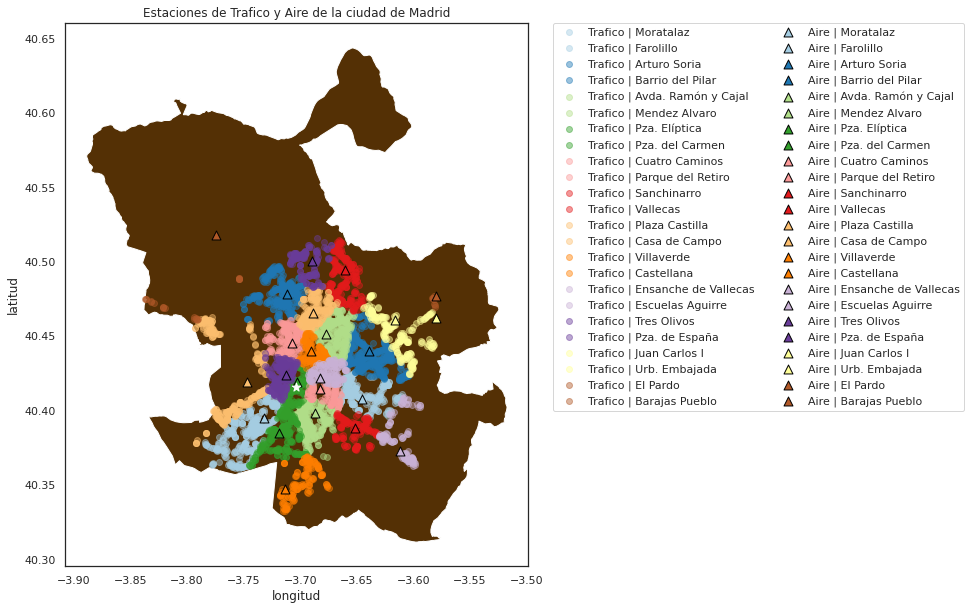

In [388]:
import osmnx as ox
import seaborn as sns
import matplotlib.pyplot as plt
from pyhandy.vizutils import subplotted

sns.set(style="white", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))
ox.config(use_cache=True, log_console=True)

query = {'city': 'Madrid'}
gdf = ox.geocode_to_gdf(query,which_result=1)

num_estaciones_to_plot = len(trafico_aire_ubicaciones.estacion_aire.unique())

ax = gdf.plot(figsize=(22,10),cmap='BrBG')
ax.set_prop_cycle('color',[plt.cm.Paired(i) for i in np.linspace(0, 1,num_estaciones_to_plot)])

for estacion_aire in trafico_aire_ubicaciones.estacion_aire.unique()[:num_estaciones_to_plot]:
    ubicaciones_por_estacion = trafico_aire_ubicaciones[trafico_aire_ubicaciones.estacion_aire==estacion_aire]
    ax.scatter(ubicaciones_por_estacion.longitud,ubicaciones_por_estacion.latitud,label=f'Trafico | {estacion_aire}',alpha=0.45)
    
for estacion_aire in trafico_aire_ubicaciones.estacion_aire.unique()[:num_estaciones_to_plot]:
    lat_estacion = trafico_aire_ubicaciones[trafico_aire_ubicaciones.estacion_aire==estacion_aire].iloc[0].latitud_estacion_aire
    long_estacion = trafico_aire_ubicaciones[trafico_aire_ubicaciones.estacion_aire==estacion_aire].iloc[0].longitud_estacion_aire
    ax.scatter(long_estacion,lat_estacion,label=f'Aire | {estacion_aire}',marker='^',s=80,edgecolors='black')

ax.scatter(-3.7037,40.4158,color='white',marker='*',s=80) #Ayto Madrid
ax.set(title="Estaciones de Trafico y Aire de la ciudad de Madrid",ylabel='latitud',xlabel='longitud')
ax.legend(loc='upper center',ncol=2,bbox_to_anchor=(1.5,1.01))

---------------

In [393]:
# #verificar si efectivamente las estaciones de trafico cambian de ubicacion de un año a otro de manera significativa

from itertools import combinations
from IPython.display import display
from geopy.distance import geodesic, distance

df = (pmed_ubicaciones[['cod_cent','nombre','year','latitud','longitud']]
 .drop_duplicates(subset=['cod_cent','latitud','longitud'])
 .dropna(subset=['latitud','longitud'])
)
df = df[df.duplicated(subset=['cod_cent'],keep=False)].sort_values('cod_cent')
significant_diff = 1.5 #Cambios de latitud o longitud de esta magnitud en km se consideraran significantes
num_significantes = 0
for cod in df.cod_cent.unique():
    df_cod = df[df.cod_cent==cod]
    diff_ubicaciones = np.array([geodesic(a,b).km for a,b in combinations(zip(df_cod.latitud,df_cod.longitud),2)])
    if any(diff_ubicaciones>significant_diff):
#         print(f"La estacion con codigo {cod} hace un cambio de ubicacion significativo segun lo marcado. (lat:{max(significant_diff_in_lat):.4f},long:{max(significant_diff_in_lon):.4f})")
#         print(" - ".join(f"{round(a,7),round(b,7)}" for a,b in zip(df_cod.latitud,df_cod.longitud)))
#         display(df_cod)
        num_significantes += 1
print(f"Hay {num_significantes}/{len(df.cod_cent.unique())} ({(num_significantes/len(df.cod_cent.unique()))*100:.3f}%) puntos de medida de trafico que se mueven de ubicacion por mas de {significant_diff}km a lo largo de los años")

Hay 64/4519 (1.416%) puntos de medida de trafico que se mueven de ubicacion por mas de 1.5km a lo largo de los años


In [358]:
# # Funciones para calcular la distancia de una ubicacion a todas las estaciones de aire disponibles

# from geopy.distance import geodesic, distance

aire_lat = estaciones_calidad_aire_info.latitud
aire_long = estaciones_calidad_aire_info.longitud

def haversine(long1,lat1,long2,lat2):
    '''
    Haversine formula to compute distance between two geographic point (lat,long)
    Return the distance in km from one point to another
    https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
    '''
    #convert decimal degrees to radians 
    long1_rad,lat1_rad,long2_rad,lat2_rad = map(np.radians,[long1,lat1,long2,lat2])
    
    #Apply haversine formula
    longdist = long1_rad-long2_rad
    latdist = lat1_rad-lat2_rad    
    a = np.sin(latdist/2)**2 + np.cos(lat1_rad)*np.cos(lat2_rad)*(np.sin(longdist/2)**2)
    c = 2 * np.arcsin(np.sqrt(a))
    #radius of earth is 6371km
    dist_km = 6371*c
    return dist_km

get_closest_aq_station_harvesine = lambda lat,long : estaciones_calidad_aire_info.codigo_corto.loc[haversine(aire_long,aire_lat,long,lat).idxmin()]

# get_closest_aq_station_geo = lambda lat,long : estaciones_calidad_aire_info.codigo_corto.iloc[np.argmin([geodesic((lat,long),(a,b)).km for a,b in zip(aire_lat,aire_long)])]


--------------------